In [137]:
import pandas as pd
# read dataset
df = pd.read_csv('APPL.csv')
df.head()

,Unnamed: 0,name,security_id,amount,issue_date,issue_yield,maturity_date,coupon_class,commission_percent,current_amount_outstanding,cusip,coupon_rate,currency,sector,symbol,organization_id,sector_name
0,0,Apple Inc,55766,8.750000e+08,2015-02-25,NaN,2024-11-25,FIX,NaN,8.750000e+08,NaN,0.37500,CHF,45202030,AAPL,912,Information Technology
1,1,Apple Inc,57516,7.500000e+08,2015-07-31,309.0,2029-07-31,FIX,NaN,7.500000e+08,NaN,3.05000,GBP,45202030,AAPL,912,Information Technology
2,2,Apple Inc,59592,3.750000e+08,2015-02-25,NaN,2030-02-25,FIX,NaN,3.750000e+08,NaN,0.75000,CHF,45202030,AAPL,912,Information Technology
3,3,Apple Inc,61185,1.000000e+09,2017-03-03,430.0,2047-03-03,FIX,NaN,1.000000e+09,NaN,4.30000,USD,45202030,AAPL,912,Information Technology
4,4,Apple Inc,22081,2.000000e+09,2013-05-03,NaN,2018-05-03,FLT,NaN,0.000000e+00,037833AG5,2.03698,USD,45202030,AAPL,912,Information Technology


In [138]:
# soft by issue date to create time series
df = df.sort_values('issue_date')

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [50, 5]

# create primary target labels
df['issue_date'].fillna(method='ffill', inplace = True)
df['target'] = df.amount.shift(-1)
# reducing value small scale
df['target'] = df['target']/100000000

df.head(10)

,Unnamed: 0,name,security_id,amount,issue_date,issue_yield,maturity_date,coupon_class,commission_percent,current_amount_outstanding,cusip,coupon_rate,currency,sector,symbol,organization_id,sector_name,target
4,4,Apple Inc,22081,2.000000e+09,2013-05-03,NaN,2018-05-03,FLT,NaN,0.000000e+00,037833AG5,2.03698,USD,45202030,AAPL,912,Information Technology,40.0
5,5,Apple Inc,22082,4.000000e+09,2013-05-03,107.6,2018-05-03,FIX,NaN,0.000000e+00,037833AJ9,1.00000,USD,45202030,AAPL,912,Information Technology,30.0
21,21,Apple Inc,22084,3.000000e+09,2013-05-03,388.3,2043-05-04,FIX,NaN,3.000000e+09,037833AL4,3.85000,USD,45202030,AAPL,912,Information Technology,55.0
20,20,Apple Inc,22083,5.500000e+09,2013-05-03,241.5,2023-05-03,FIX,NaN,5.500000e+09,037833AK6,2.40000,USD,45202030,AAPL,912,Information Technology,20.0
26,26,Apple Inc,22104,2.000000e+09,2014-05-06,210.8,2019-05-06,FIX,NaN,2.000000e+09,037833AQ3,2.10000,USD,45202030,AAPL,912,Information Technology,30.0
24,24,Apple Inc,22102,3.000000e+09,2014-05-06,288.9,2021-05-06,FIX,NaN,3.000000e+09,037833AR1,2.85000,USD,45202030,AAPL,912,Information Technology,25.0
23,23,Apple Inc,22101,2.500000e+09,2014-05-06,346.0,2024-05-06,FIX,NaN,2.500000e+09,037833AS9,3.45000,USD,45202030,AAPL,912,Information Technology,10.0
22,22,Apple Inc,22100,1.000000e+09,2014-05-06,NaN,2019-05-06,FLT,NaN,1.000000e+09,037833AP5,2.64050,USD,45202030,AAPL,912,Information Technology,10.0
25,25,Apple Inc,22103,1.000000e+09,2014-05-06,448.3,2044-05-06,FIX,NaN,1.000000e+09,037833AT7,4.45000,USD,45202030,AAPL,912,Information Technology,14.0
68,68,Apple Inc,25941,1.400000e+09,2014-11-10,108.2,2022-11-10,FIX,NaN,1.400000e+09,037833AU4,1.00000,EUR,45202030,AAPL,912,Information Technology,14.0


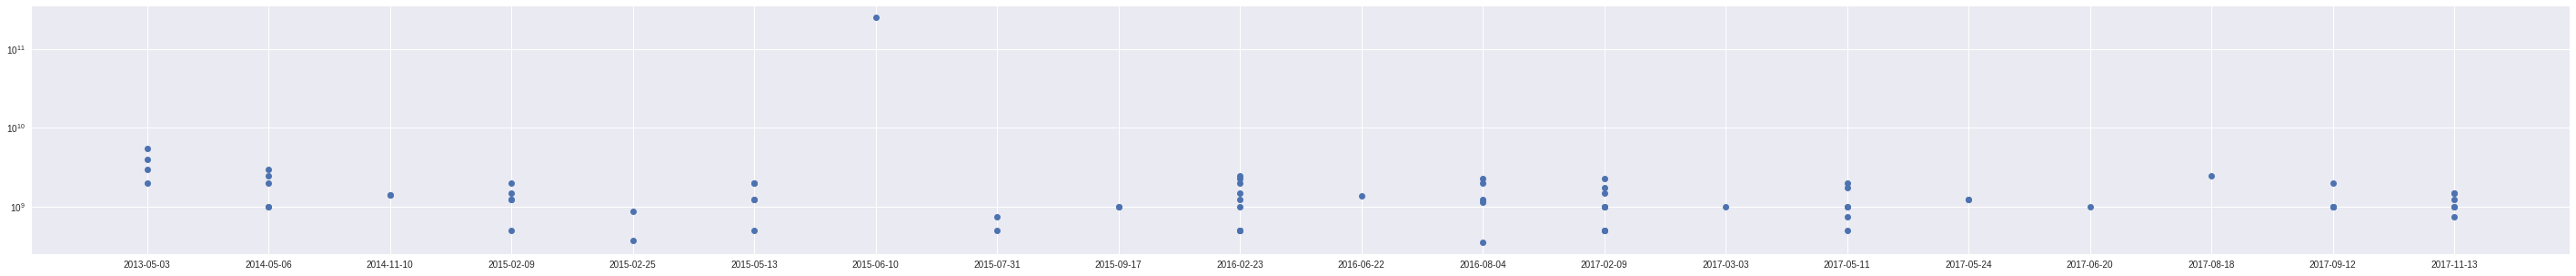

In [140]:
# plotting time series of issue_date to amount in log scale
import matplotlib.pyplot as plt
import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
df =  df.sort_values('issue_date')
plt.yscale('log')
plt.plot_date(df['issue_date'], df['amount'])

In [141]:
# getting cross correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Unnamed: 0,security_id,amount,issue_yield,commission_percent,current_amount_outstanding,coupon_rate,sector,organization_id,target
Unnamed: 0,1.000000,-0.311976,-0.106420,-0.048672,nan,-0.102162,0.029352,nan,nan,-0.027054
security_id,-0.311976,1.000000,0.431624,0.022448,nan,0.432099,-0.138243,nan,nan,-0.053349
amount,-0.106420,0.431624,1.000000,-0.307005,nan,0.999799,-0.255075,nan,nan,-0.018081
issue_yield,-0.048672,0.022448,-0.307005,1.000000,nan,-0.303292,0.991633,nan,nan,0.009548
commission_percent,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
current_amount_outstanding,-0.102162,0.432099,0.999799,-0.303292,nan,1.000000,-0.249502,nan,nan,-0.018075
coupon_rate,0.029352,-0.138243,-0.255075,0.991633,nan,-0.249502,1.000000,nan,nan,0.016721
sector,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
organization_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
target,-0.027054,-0.053349,-0.018081,0.009548,nan,-0.018075,0.016721,nan,nan,1.000000


In [142]:
# generating new cross feature
df['generated_feature'] = df['amount'] * df['current_amount_outstanding']
df['generated_target'] = df.generated_feature.shift(-1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Unnamed: 0,security_id,amount,issue_yield,commission_percent,current_amount_outstanding,coupon_rate,sector,organization_id,target,generated_feature,generated_target
Unnamed: 0,1.000000,-0.311976,-0.106420,-0.048672,nan,-0.102162,0.029352,nan,nan,-0.027054,-0.100734,0.043463
security_id,-0.311976,1.000000,0.431624,0.022448,nan,0.432099,-0.138243,nan,nan,-0.053349,0.436319,-0.045198
amount,-0.106420,0.431624,1.000000,-0.307005,nan,0.999799,-0.255075,nan,nan,-0.018081,0.999580,-0.011709
issue_yield,-0.048672,0.022448,-0.307005,1.000000,nan,-0.303292,0.991633,nan,nan,0.009548,-0.308126,0.080439
commission_percent,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
current_amount_outstanding,-0.102162,0.432099,0.999799,-0.303292,nan,1.000000,-0.249502,nan,nan,-0.018075,0.999515,-0.011537
coupon_rate,0.029352,-0.138243,-0.255075,0.991633,nan,-0.249502,1.000000,nan,nan,0.016721,-0.259007,0.075516
sector,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
organization_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
target,-0.027054,-0.053349,-0.018081,0.009548,nan,-0.018075,0.016721,nan,nan,1.000000,-0.017748,-0.011645


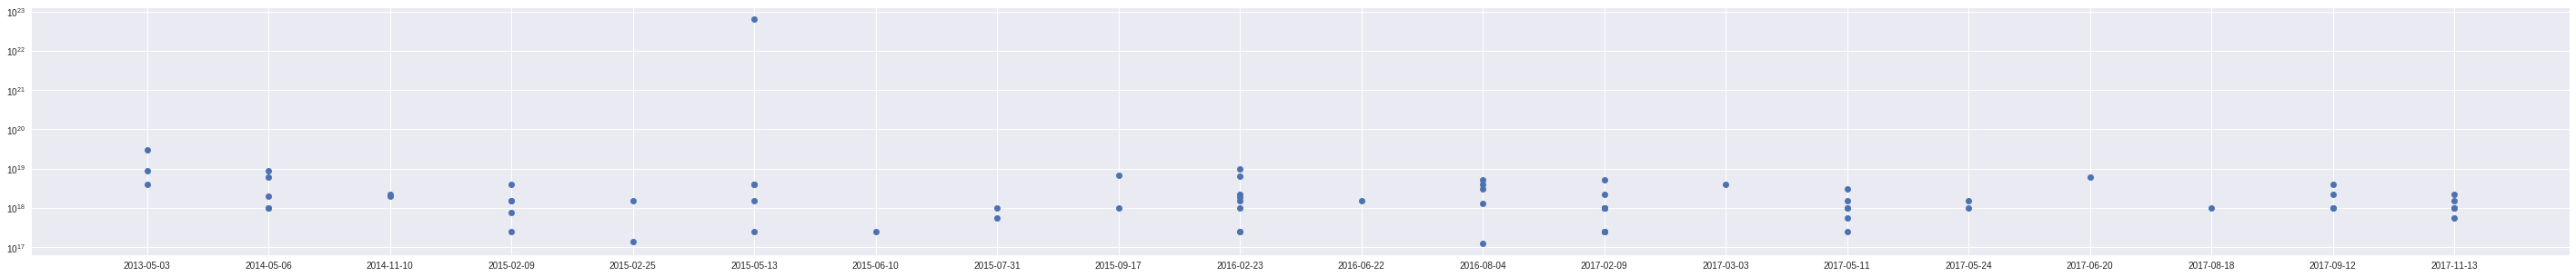

In [143]:
# plotting again with new cross feature
plt.yscale('log')
plt.plot_date(df['issue_date'], df['generated_target'])

# Answers

# Ans 1:
A time series approach that is simple should be followed first. To do that we explore the data and get the answer to Q1. In the next answers, the answer of Q1 is given.

## Ans 2 (and 1):
I select the amount as the target variable primarily. Then I create a target column after sorting the dataset by issue_date.

In the sorted dataset, each target value is the amount value from its previous row.

The intention is, as we traverse the dataset, the immediate next amount value is our training label or target for current sample.

As we plot the time series, we can see that there is seasonality in the amount and it might be a good target feature at this point.

## Ans 3:
We plot a correlation matrix for all the numerical feature pairs and we find that the amount has a high correlation (0.99) with current_amount_outstanding. As target is derived from amount, so we assume that the target is correlated with current_amount_outstanding.

So we multiply amount with current_amount_outstanding and create a crossed feature naming generated_feature.

We follow the approach mentioned in Ans 1 (considering the next time point's target value to be the training label for current time point), and create the final target feature, 'generated_target' column for training.

In brief, I find: amount, current_amount_outstanding is a good choice to predict the issuance.

## Ans 4:

This time series visualization is showing frequent seasonality because the variance is not increasing over time. Rather, the variance is pretty steady with some rare anomaly.

So my selection model will be a nonlinear regression model supporting steady variance or Homoscedasticity.

We can select nonlinear regression method.
For the error function, we will use MAE or mean absolute error because the time series is steady over time.